### Force-directed layout of the ff supply chains

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [1]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
import pandas as pd

In [2]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [3]:
sys.path.append(root)

In [4]:
from ffsc.flow import *

In [5]:
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [6]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [7]:
gen = make_nx('coal')

{'pipelines-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'coalmines-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-shipping': {'gas': 3063.4560063711274, 'coal': 0, 'oil': 0}, 'oilfields-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'pipelines-pipelines': {'gas': 0.1304728626096061, 'coal': 0, 'oil': 0.3073277895310929}, 'ports-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-shipping': {'gas': 27.472527472527478, 'coal': 48.75670404680645, 'oil': 34.11921252857485}, 'ports-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'procplant-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-railways': {'gas': 0, 'coal': 0.08667858497210033, 'oil': 0}, 'refineries-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'shipping-shipping': {'gas': 0.

In [8]:
gen.all_data_dirs = all_data_dirs

In [9]:
gen._load_dfs()

In [10]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [11]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [12]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [16]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [14]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [17]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [18]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [19]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [20]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


**do edges_df**

In [21]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [22]:
edge_df = edge_df[edge_df.start!='supersource']

In [23]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [24]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [25]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [26]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [27]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [28]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [29]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [30]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


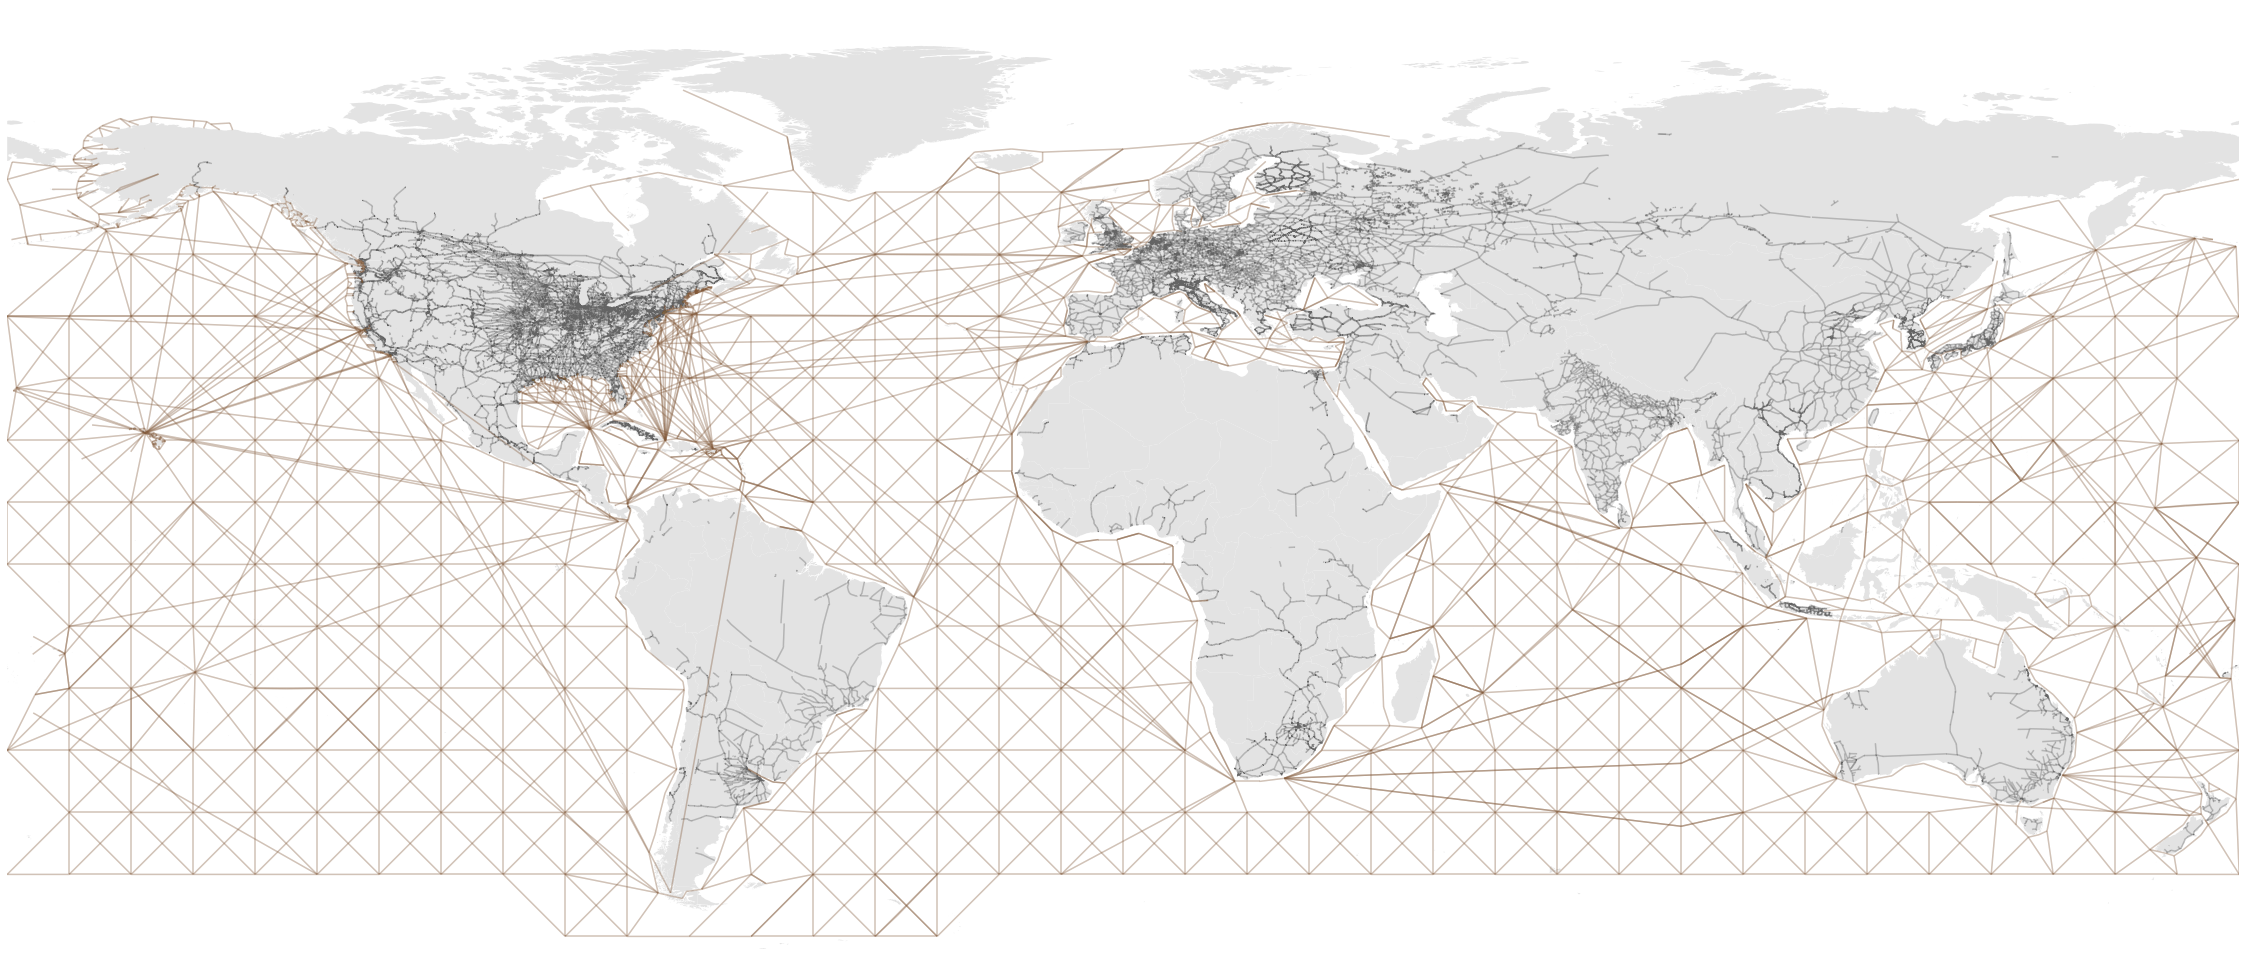

In [32]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')

# plot edges
edge_gdf[(edge_gdf['start_type']=='railway') & (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
edge_gdf[(edge_gdf['start_type']=='shipping') & (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
#fig.savefig('coal_supplynetwork.png')

plt.show()

In [ ]:
edge_df

**do nodes df**

In [ ]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [ ]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [ ]:
node_df = node_df[node_df.node!='supersource']

In [ ]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [ ]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

In [ ]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [ ]:
node_gdf

In [ ]:
node_gdf['type'].unique()

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# plot edges
edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('coal_supplynetwork.png')

plt.show()

### Force-Directed Layout

Out of memory error... loolll
... try again once having run community detection

In [ ]:
edge_df['z_inv'] = 1/(edge_df['z']+1)

In [ ]:
len(node_df.node.unique())

In [ ]:
# get pos as dict
pos = node_df.drop_duplicates(subset='node')[['node','coordinates']].set_index('node').to_dict('index')

In [ ]:
pos = {kk:json.loads(vv['coordinates']) for kk, vv in pos.items()}

In [ ]:
z_inv_attr = edge_df[['start','end','z_inv']].set_index(['start','end']).to_dict(orient='index')

In [ ]:
nx.set_edge_attributes(gen.G, z_inv_attr)

In [ ]:
# pos = nx.spring_layout(gen.G, pos, iterations=1, weight='z_inv')
# big ole 'out of memory' error

### load flows and visualise them

In [ ]:
flow_dict = pickle.load(open('./../coal_flow_dict.pkl','rb'))

In [ ]:
len(flow_dict.keys())

In [ ]:
flow_dict_reshape = {(i,j): flow_dict[i][j] 
                           for i in flow_dict.keys() 
                           for j in flow_dict[i].keys()}

In [ ]:
flow_dict_reshape

In [ ]:
flow_df = pd.DataFrame.from_dict(flow_dict_reshape, orient='index')

In [ ]:
flow_df['source']=flow_df.index.str[0]

In [ ]:
flow_df = flow_df[~(flow_df.source=='supersource')]

In [ ]:
flow_df = flow_df.rename(columns={0:'flow'})

In [ ]:
flow_df

In [ ]:
edge_df = edge_df.set_index(['start','end'])

In [ ]:
edge_df['flow']=0

In [ ]:
edge_df

In [ ]:
edge_df.loc[flow_df.index, 'flow'] = flow_df['flow']

In [ ]:
edge_df.flow.sum()

In [ ]:
edge_df = edge_df.reset_index()

In [ ]:
edge_df = edge_df[edge_df['start']!='supersource']

In [ ]:
edge_df

### Visualise flow

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(30,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# plot edges
segs = []
line_widths=[]
line_colors = []

for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['railways'])
    
for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['shipping'])

line_collection = LineCollection(segs, linewidths=line_widths, colors=line_colors)
    
ax.add_collection(line_collection)
    
ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('coal_flownetwork.png')

plt.show()